<h3>: Linear Regression</h3>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dt = pd.read_csv('./sales_dataset/Advertising.csv')
dt

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
dt.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<h2>Describe data</h2>

In [4]:
dt.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
dt.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [9]:
df2 = dt[['TV', 'Sales']]
df2

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [28]:
x_adOn = df2.iloc[:, :1]
y_sales = df2.iloc[:, 1:2]

<h2>Training and Testing Data Splitting</h2>

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_adOn, y_sales, test_size = 0.3, random_state=0)

In [30]:
print(x_train.shape, y_train.shape)

(140, 1) (140, 1)


<h2>Plotting data</h2>

In [31]:
ad = x_train
sale = y_train

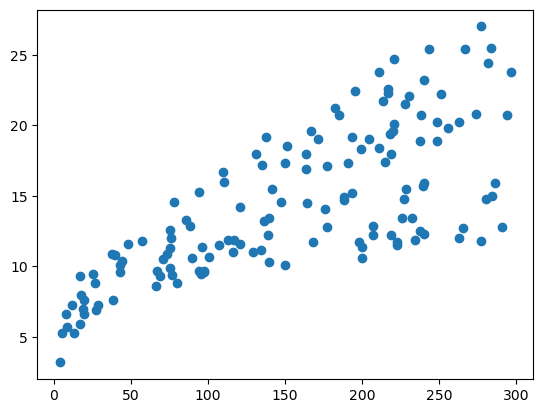

In [32]:
plt.scatter(ad, sale, label="Sales")

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

<h2>Training model</h2>

In [34]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
lr.coef_

array([[0.04581434]])

In [39]:
lr.intercept_

array([7.31081017])

In [50]:
lr.score(x_train, y_train)

0.5552336104251212

<h2>Evaluating model</h2>

In [44]:
from sklearn import metrics

In [49]:
pred_sales = lr.predict(x_test)
print(metrics.r2_score(y_test, pred_sales)*100)

72.5606346597073


<h2> Plotting Predicted line</h2>

Text(0, 0.5, 'Sales')

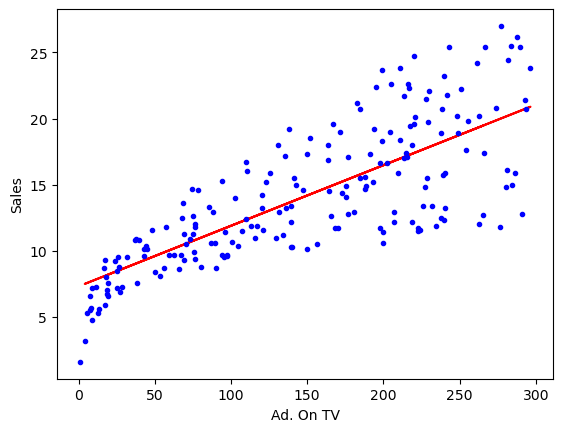

In [42]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x_adOn, y_sales, "b.")
plt.xlabel("Ad. On TV")
plt.ylabel("Sales")